# **Analyzing and Predicting Business Activity for Cafes and Restaurants in Melbourne**

**Authored by:** Sachitha Sadeepa Kasthuriarachchi

**Duration:** 180 mins

**Level:** Beginner/Intermediate

**Pre-requisite Skills:**  Python Programming,Jupyter Notebooks,Power BI,Data Analysis,Machine Learning and Geospatial Analysis.


**Background:**

I am planning to open a new cafe in Melbourne and want to ensure that my business meets customer demands and adheres to area-specific trends. To help with this, I am using a comprehensive dataset of existing cafes and restaurants, which includes information about their seating capacity, location, industry type, and other relevant factors.

**Objectives:**

1. **Distribution Analysis:** Understand the distribution of cafes and restaurants across different areas of Melbourne.

2. **Seating Capacity Analysis:** Compare the seating capacity for indoor and outdoor seating.
   
3. **Industry Analysis:** Explore the prevalence of different industries within the cafes and restaurants sector.
     
4. **Geospatial Analysis:** Visualize the geographic distribution of cafes and restaurants across Melbourne.
    
5. **Trend Analysis:** Identify trends in business activity over different census years.

6. **Prediction Task:** Develop a predictive model to forecast the number of seats based on various features.

**Scenario:**

1. **Informed Decision-Making:** I use the insights provided by the data analysis to make data-driven decisions about my new cafe, reducing the risk of underestimating or overestimating seating capacity.

2. **ompetitive Advantage:** By understanding local trends and customer preferences, I can tailor my business strategy to stand out in a competitive market.

3. **Resource Optimization:** The predictive model helps me allocate resources effectively, ensuring I invest appropriately in indoor and outdoor seating based on demand forecasts.

## **1. Data Loading and Examination**

Below are the links to the four data sets that will be used in this for this use case.

[**Data Set 1**](https://data.melbourne.vic.gov.au/explore/dataset/cafes-and-restaurants-with-seating-capacity/information/) **Café, restaurant, bistro seats.** This dataset contains **60055** records.

[**Data Set 2**](https://data.melbourne.vic.gov.au/explore/dataset/blocks-for-census-of-land-use-and-employment-clue/information/?location=13,-37.80246,144.94417&basemap=mbs-7a7333) **Blocks for Census of Land Use and Employment (CLUE).** This dataset contains **606** records.


[**Data Set 3**](https://data.melbourne.vic.gov.au/explore/dataset/employment-by-block-by-clue-industry/information/) **Jobs per CLUE industry for blocks.** This dataset contains **12349** records.


[**Data Set 4**](https://data.melbourne.vic.gov.au/explore/dataset/floor-space-by-use-by-block/information/) **Floor space per space use for blocks.** This dataset contains **12349** records.


### **Required Libraries and Packages**

In [1]:
# Data Handling
import requests                                       # For sending HTTP requests to fetch data from web sources
import pandas as pd                                   # For data manipulation and analysis
from io import StringIO                               # For handling string-based I/O operations

# Geocoding
# Install the geopy package using pip
# pip install geopy
from geopy.geocoders import ArcGIS                    # For converting addresses into geographic coordinates
from geopy.exc import GeocoderTimedOut, GeocoderServiceError  # For handling geocoding exceptions

# Multithreading for Efficiency
import concurrent.futures                             # For running tasks in parallel threads
import time                                           # For adding delays or measuring time

# Data Visualization
import matplotlib.pyplot as plt                       # For creating static visualizations like plots and charts
import seaborn as sns                                 # For advanced data visualization and statistical plotting

# Interactive Maps
import folium                                         # For creating interactive maps
from folium.plugins import MarkerCluster              # For clustering multiple markers on a map

# Machine Learning
from sklearn.model_selection import train_test_split  # For splitting datasets into training and testing sets
from sklearn.preprocessing import OneHotEncoder       # For encoding categorical variables as one-hot numeric arrays
from sklearn.compose import ColumnTransformer         # For transforming specific columns in a pipeline
from sklearn.pipeline import Pipeline                 # For building machine learning pipelines
from sklearn.ensemble import RandomForestRegressor    # For Random Forest-based regression modeling

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error  # For evaluating the model's performance


### **1.0 Dataset Imported through API**

In [2]:
#Function to collect data
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = api_key #use if use datasets API_key permissions
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        #'api_key': apikey  #use if use datasets API_key permissions
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f'Request failed with status code {response.status_code}')



**Function Summary: `collect_data`**

The `collect_data` function retrieves a dataset from the Melbourne Open Data API in CSV format. It constructs a URL using a provided dataset ID and sends a GET request to the API. If the request is successful, the function reads the CSV data into a pandas DataFrame using `pd.read_csv` with `StringIO`. In case of a failed request, it returns an error message with the status code. The function handles all records and is flexible for different datasets by modifying the dataset ID.


### **1.2 Load the Dataset**

In [3]:
# Set dataset_id to query for the API call dataset name
dataset_1_id = 'cafes-and-restaurants-with-seating-capacity'
dataset_2_id = 'blocks-for-census-of-land-use-and-employment-clue'
dataset_3_id = 'employment-by-block-by-clue-industry'
dataset_4_id = 'floor-space-by-use-by-block'

**Setting Dataset IDs for API Calls**

This section defines the dataset IDs for querying specific datasets from the Melbourne Open Data API:

1. **`dataset_1_id`**: Cafes and restaurants with seating capacity.
2. **`dataset_2_id`**: Blocks for Census of Land Use and Employment (CLUE).
3. **`dataset_3_id`**: Employment by block by CLUE industry.
4. **`dataset_4_id`**: Floor space by use by block.

These IDs will be used in API calls to retrieve the corresponding data from the Melbourne Open Data platform.


In [4]:
# Save dataset to df1.df2.df3 and df4 varaible
df1 = collect_data(dataset_1_id)
df2 = collect_data(dataset_2_id)
df3 = collect_data(dataset_3_id)
df4 = collect_data(dataset_4_id)

**Storing Datasets in DataFrame Variables**

The code uses the `collect_data` function to fetch datasets from the Melbourne Open Data API and store them in pandas DataFrames:

- **`df1`**: Contains data from the "Cafes and Restaurants with Seating Capacity" dataset.
- **`df2`**: Holds data from the "Blocks for Census of Land Use and Employment (CLUE)" dataset.
- **`df3`**: Stores data from the "Employment by Block by CLUE Industry" dataset.
- **`df4`**: Contains data from the "Floor Space by Use by Block" dataset.

Each DataFrame (`df1`, `df2`, `df3`, `df4`) is ready for analysis.


### **1.3 Exmine the Datasets**

The objective of this task is to thoroughly inspect and analyze the datasets (`df1`, `df2`, `df3`, `df4`). The process includes:

1. **Data Structure Overview**:
   - Use functions like `head()`, `info()`, and `describe()` to gain insights into the datasets' structure, including the number of columns, data types, and statistical summaries.

2. **Check for Missing Data**:
   - Assess the datasets for missing or null values using `isnull().sum()` or `df.isna().sum()`.
   - Determine if any columns require cleaning or imputation.

3. **Examine Data Consistency**:
   - Review the datasets for inconsistencies, such as duplicate records or outliers.
   - Ensure that data entries are in the expected format (e.g., date formats, numeric ranges).

4. **Preliminary Analysis**:
   - Conduct basic exploratory analysis (e.g., value counts, unique categories) to understand key patterns or trends in the data.
   - Identify any notable differences between the datasets to guide further analysis.

By thoroughly examining the datasets, you can better understand their structure and quality, guiding your next steps in data cleaning or selection.


#### **1.3.1 Data Set 1**

In [5]:
# Check number of records in df1
print(f'The dataset contains {len(df1)} records.')
# View df1
df1.head(3)

The dataset contains 60055 records.


,census_year,block_id,property_id,base_property_id,building_address,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,seating_type,number_of_seats,longitude,latitude,location
0,2017,6,578324,573333,2 Swanston Street MELBOURNE 3000,Melbourne (CBD),Transport Hotel,"Tenancy 29, Ground , 2 Swanston Street MELBOUR...",4520,"Pubs, Taverns and Bars",Seats - Indoor,230,144.969942,-37.817778,"-37.817777826050005, 144.96994164279243"
1,2017,6,578324,573333,2 Swanston Street MELBOURNE 3000,Melbourne (CBD),Transport Hotel,"Tenancy 29, Ground , 2 Swanston Street MELBOUR...",4520,"Pubs, Taverns and Bars",Seats - Outdoor,120,144.969942,-37.817778,"-37.817777826050005, 144.96994164279243"
2,2017,11,103957,103957,517-537 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Altius Coffee Brewers,"Shop , Ground , 517 Flinders Lane MELBOURNE 3000",4512,Takeaway Food Services,Seats - Outdoor,4,144.956486,-37.819875,"-37.819875445799994, 144.95648638781466"


**Code Summary: Checking Number of Records and Viewing Data**

1. Check Number of Records:
   - The code uses `len(df1)` to determine the total number of records in the `df1` DataFrame.
   - It prints the number of records in a formatted string: `The dataset contains {len(df1)} records.`

2. View Data:
   - The `head(3)` function displays the first 3 rows of the `df1` DataFrame, providing a quick preview of the dataset.


#### **1.3.1 Data Set 2**

In [6]:
# Check number of records in df2
print(f'The dataset contains {len(df2)} records.')
# View df2
df2.head(3)

The dataset contains 606 records.


,geo_point_2d,geo_shape,block_id,clue_area
0,"-37.82296169692379, 144.95049282288122","{""coordinates"": [[[144.9479230372, -37.8233694...",1112,Docklands
1,"-37.78537422996195, 144.94085920366408","{""coordinates"": [[[144.9426153438, -37.7866287...",927,Parkville
2,"-37.777687358375964, 144.94600024715058","{""coordinates"": [[[144.9425926939, -37.7787229...",929,Parkville


**Code Summary: Checking Number of Records and Viewing Data in df2**

1. Check Number of Records:
   - The code checks the number of records in the DataFrame `df2` using `len(df2)`.
   - It prints the result in a formatted string: `The dataset contains {len(df2)} records.`

2. View Data:
   - The `head(3)` method displays the first 3 rows of the DataFrame `df2`, allowing a quick preview of its content.


#### **1.3.1 Data Set 3**

In [7]:
# Check number of records in df3
print(f'The dataset contains {len(df3)} records.')
# View df3
df3.head(3)

The dataset contains 12394 records.


,census_year,block_id,clue_small_area,accommodation,admin_and_support_services,agriculture_and_mining,arts_and_recreation_services,business_services,construction,education_and_training,...,information_media_and_telecommunications,manufacturing,other_services,public_administration_and_safety,real_estate_services,rental_and_hiring_services,retail_trade,transport_postal_and_storage,wholesale_trade,total_jobs_in_block
0,2022,4,Melbourne (CBD),0.0,0.0,0.0,362.0,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,0.0,0.0,38.0,368.0,0.0,1008.0
1,2022,5,Melbourne (CBD),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,6,Melbourne (CBD),0.0,0.0,0.0,203.0,0.0,0.0,0.0,...,NaN,0.0,NaN,0.0,NaN,0.0,47.0,0.0,0.0,647.0


**Code Summary: Checking Number of Records and Viewing Data in df3**

1. Check Number of Records:
   - The code checks the total number of records in the DataFrame `df3` using the `len(df3)` function.
   - It prints the result in a formatted string: `The dataset contains {len(df3)} records.`

2. View Data:
   - The `head(3)` method is used to display the first 3 rows of the DataFrame `df3`, providing a quick glimpse of the dataset's structure.


#### **1.3.1 Data Set 4**

In [8]:
# Check number of records in df4
print(f'The dataset contains {len(df4)} records.')
# View df4
df4.head(3)

The dataset contains 12394 records.


,census_year,block_id,clue_small_area,commercial_accommodation,common_area,community_use,educational_research,entertainment_recreation_indoor,equipment_installation,hospital_clinic,...,transport,transport_storage_uncovered,unoccupied_under_construction,unoccupied_under_demolition_condemned,unoccupied_under_renovation,unoccupied_undeveloped_site,unoccupied_unused,wholesale,workshop_studio,total_floor_space_in_block
0,2013,2387,North Melbourne,0.0,NaN,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,44471.0
1,2013,2390,North Melbourne,0.0,1040.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5357.0,NaN,5071.0,48332.0
2,2013,2501,Kensington,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21456.0


**Code Summary: Checking Number of Records and Viewing Data in df4**

1. Check Number of Records:
   - The code checks the total number of records in the DataFrame `df4` using the `len(df4)` function.
   - It prints the result in a formatted string: `The dataset contains {len(df4)} records.`

2. View Data:
   - The `head(3)` method is used to display the first 3 rows of the DataFrame `df4`, allowing a quick preview of the dataset.


## **2.0 Loking for most reliable data set**

The goal of this task is to evaluate and identify the most reliable dataset among multiple sources (`df1`, `df2`, `df3`, `df4`). Factors such as data completeness, consistency, accuracy, and relevance should be considered when determining reliability. This involves:

1. **Assessing Data Quality**:
   - Check for missing values or incomplete records.
   - Verify data consistency (e.g., format, ranges, or duplicates).

2. **Comparing Sources**:
   - Evaluate if the datasets are up-to-date and relevant for the specific analysis.
   - Review metadata or documentation to understand how the data was collected.

3. **Decision Making**:
   - Based on the analysis, choose the dataset that provides the most trustworthy, accurate, and consistent information for further processing.


#### **2.1 Identifying Missing Values and Propotions in the Dataset 1**

In [9]:
missing_values = df1.isnull().sum()
print("--------------------------Current Missing Values --------------------------")
print(missing_values)

#Lets see propotion
missing_proportion = (missing_values / len(df1))*100
print("---------------------Current Missing Values Propotion ---------------------")
print(missing_proportion.round(3).astype(str) + '%')

--------------------------Current Missing Values --------------------------
census_year                       0
block_id                          0
property_id                       0
base_property_id                  0
building_address                  0
clue_small_area                   0
trading_name                      0
business_address                  0
industry_anzsic4_code             0
industry_anzsic4_description      0
seating_type                      0
number_of_seats                   0
longitude                       527
latitude                        527
location                        527
dtype: int64
---------------------Current Missing Values Propotion ---------------------
census_year                       0.0%
block_id                          0.0%
property_id                       0.0%
base_property_id                  0.0%
building_address                  0.0%
clue_small_area                   0.0%
trading_name                      0.0%
business_address      

#### **2.1 Identifying Missing Values and Propotions in the Dataset 2**

In [10]:
missing_values = df2.isnull().sum()
print("--------------------------Current Missing Values --------------------------")
print(missing_values)

#Lets see propotion
missing_proportion = (missing_values / len(df2))*100
print("---------------------Current Missing Values Propotion ---------------------")
print(missing_proportion.round(3).astype(str) + '%')

--------------------------Current Missing Values --------------------------
geo_point_2d    0
geo_shape       0
block_id        0
clue_area       0
dtype: int64
---------------------Current Missing Values Propotion ---------------------
geo_point_2d    0.0%
geo_shape       0.0%
block_id        0.0%
clue_area       0.0%
dtype: object


#### **2.1 Identifying Missing Values and Propotions in the Dataset 3**

In [11]:
missing_values = df3.isnull().sum()
print("--------------------------Current Missing Values --------------------------")
print(missing_values)

#Lets see propotion
missing_proportion = (missing_values / len(df3))*100
print("---------------------Current Missing Values Propotion ---------------------")
print(missing_proportion.round(3).astype(str) + '%')

--------------------------Current Missing Values --------------------------
census_year                                    0
block_id                                       0
clue_small_area                                0
accommodation                               2408
admin_and_support_services                  2019
agriculture_and_mining                       599
arts_and_recreation_services                3927
business_services                           1875
construction                                2075
education_and_training                      2553
electricity_gas_water_and_waste_services    2468
finance_and_insurance                       1578
food_and_beverage_services                  2628
health_care_and_social_assistance           2560
information_media_and_telecommunications    2298
manufacturing                               2309
other_services                              3280
public_administration_and_safety            1852
real_estate_services                      

#### **2.1 Identifying Missing Values and Propotions in the Dataset 4**

In [12]:
missing_values = df4.isnull().sum()
print("--------------------------Current Missing Values --------------------------")
print(missing_values)

#Lets see propotion
missing_proportion = (missing_values / len(df4))*100
print("---------------------Current Missing Values Propotion ---------------------")
print(missing_proportion.round(3).astype(str) + '%')

--------------------------Current Missing Values --------------------------
census_year                                 0
block_id                                    0
clue_small_area                             0
commercial_accommodation                 2236
common_area                              3088
community_use                             879
educational_research                     2585
entertainment_recreation_indoor          2530
equipment_installation                   3132
hospital_clinic                          1776
house_townhouse                          1034
institutional_accommodation               501
manufacturing                             963
office                                   2052
park_reserve                             2292
parking_commercial_covered               1847
parking_commercial_uncovered              521
parking_private_covered                  2954
parking_private_uncovered                1313
performances_conferences_ceremonies      2108
priv

## **3.0 Dataset Selection**

The goal of this task is to select the most appropriate dataset for your analysis based on a thorough evaluation. Key steps involved in this process include:

1. **Criteria for Selection**:
   - **Completeness**: Choose a dataset with minimal missing or incomplete values.
   - **Accuracy**: Ensure the dataset contains accurate and reliable data based on the source and how it was collected.
   - **Relevance**: Select the dataset that aligns most closely with your analysis objectives and research questions.

2. **Comparison of Datasets**:
   - Compare datasets (`df1`, `df2`, `df3`, `df4`) based on their size, structure, and data quality (e.g., missing values, inconsistencies).
   - Evaluate which dataset provides the richest information and is most suited for the analysis.

3. **Final Decision**:
   - After comparison, select the dataset that offers the best balance between reliability, completeness, and relevance for your use case.
   - Document the reasoning behind your choice to justify why this dataset is the most appropriate.

By carefully evaluating and selecting the dataset, you ensure a solid foundation for your analysis and model-building tasks.


### **3.1 Dataset Summary and Recommendation**

##### Data Set 1: Café, Restaurant, Bistro Seats
- **Records:** 60055
- **Missing Values:** Longitude, Latitude, Location (527 missing values each)

##### Data Set 2: Blocks for Census of Land Use and Employment (CLUE)
- **Records:** 606
- **Missing Values:** None

##### Data Set 3: Jobs per CLUE Industry for Blocks
- **Records:** 12349
- **Missing Values:** 
  - Many categories have missing values, ranging from 599 to 3927.
  - `total_jobs_in_block` has 2686 missing values.

##### Data Set 4: Floor Space per Space Use for Blocks
- **Records:** 12349
- **Missing Values:**
  - Many categories have missing values, ranging from 233 to 3132.
  - `total_floor_space_in_block` has 595 missing values.

### **3.2 Analysis and Recommendation**

#### Data Set 1: Café, Restaurant, Bistro Seats
- **Pros:** Large dataset with only a small percentage of missing values in the geographic fields.
- **Cons:** Missing geographic data might limit spatial analysis.

#### Data Set 2: Blocks for Census of Land Use and Employment (CLUE)
- **Pros:** Complete dataset with no missing values.
- **Cons:** Small size (606 records), which may limit extensive analysis.

#### Data Set 3: Jobs per CLUE Industry for Blocks
- **Pros:** Moderate size, potentially rich data for employment analysis.
- **Cons:** Significant missing values across various job categories.

#### Data Set 4: Floor Space per Space Use for Blocks
- **Pros:** Moderate size, detailed data on floor space usage.
- **Cons:** Significant missing values across various space use categories.

### **3.3 Recommendation**
**Data Set 1: Café, Restaurant, Bistro Seats** appears to be the best dataset to work with due to its large size and relatively low percentage of missing values. This dataset offers ample opportunities for meaningful analysis related to the hospitality industry, despite the missing geographic data.


## **4.0 Data Cleaning and Pre processing**

This task focuses on preparing the selected dataset for analysis by cleaning and preprocessing the data. The steps include:

1. **Handling Missing Values**:
   - Identify and address any missing or null values using techniques like:
     - Dropping rows or columns with excessive missing data.
     - Imputing missing values with mean, median, or mode.
   
2. **Removing Duplicates**:
   - Detect and remove duplicate records to ensure data consistency using `drop_duplicates()`.

3. **Outlier Detection**:
   - Use statistical methods (e.g., IQR, Z-score) to identify and handle outliers that may skew the analysis.

4. **Data Transformation**:
   - Convert data types if necessary (e.g., ensuring dates are in `datetime` format).
   - Standardize or normalize numerical features to bring them onto the same scale for machine learning models.
   - Encode categorical variables using techniques like one-hot encoding for compatibility with machine learning algorithms.

5. **Feature Engineering**:
   - Create new features or modify existing ones to enhance the dataset’s utility. This may include extracting date-related information (e.g., year, month), creating interaction terms, or performing log transformations for skewed distributions.

6. **Splitting Data**:
   - Split the dataset into training and testing sets using `train_test_split()` to ensure fair model evaluation.

These steps ensure the dataset is clean, structured, and ready for analysis or model training, minimizing potential issues during the machine learning process.


In [13]:
# Identify rows with any missing values
missing_value_rows = df1[df1.isnull().any(axis=1)]

# Print the rows with missing values
print("--------------------------Rows with Missing Values --------------------------")
missing_value_rows


--------------------------Rows with Missing Values --------------------------


,census_year,block_id,property_id,base_property_id,building_address,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,seating_type,number_of_seats,longitude,latitude,location
3082,2003,78,110714,105763,32-36 Lonsdale Street MELBOURNE 3000,Melbourne (CBD),Schwobs Swiss Gourmet Sandwich Bar,"Ground , 34 Lonsdale Street MELBOURNE 3000",4511,Cafes and Restaurants,Seats - Indoor,80,NaN,NaN,NaN
4063,2005,5,101345,101345,Flinders Street MELBOURNE 3000,Melbourne (CBD),Jetcall,"Shop 6, Flinders Street MELBOURNE 3000",5910,Internet Service Providers and Web Search Portals,Seats - Indoor,17,NaN,NaN,NaN
4471,2005,91,598270,598270,343 King Street WEST MELBOURNE 3003,West Melbourne (Residential),Biryani House,"Ground 0, 343-0 King Street WEST MELBOURNE 3003",4511,Cafes and Restaurants,Seats - Indoor,22,NaN,NaN,NaN
4589,2005,255,594107,594107,522-536 Swanston Street CARLTON 3053,Carlton,Colours Cafe,526-536 Swanston Street CARLTON 3053,4511,Cafes and Restaurants,Seats - Indoor,49,NaN,NaN,NaN
4673,2005,444,598605,598605,355-369 Spencer Street WEST MELBOURNE 3003,West Melbourne (Residential),Western Coffee Lounge,357-377 Spencer Street WEST MELBOURNE 3003,4511,Cafes and Restaurants,Seats - Outdoor,13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58989,2016,2524,616022,616022,198-204 Bellair Street KENSINGTON 3031,Kensington,The Premises Espresso,202 Bellair Street KENSINGTON 3031,4511,Cafes and Restaurants,Seats - Indoor,50,NaN,NaN,NaN
58990,2016,2524,616043,616043,176 Bellair Street KENSINGTON 3031,Kensington,White Rabbit Record Bar,176 Bellair Street KENSINGTON 3031,4511,Cafes and Restaurants,Seats - Indoor,35,NaN,NaN,NaN
58991,2016,2524,616045,616045,174 Bellair Street KENSINGTON 3031,Kensington,Sori Cafe,174 Bellair Street KENSINGTON 3031,4511,Cafes and Restaurants,Seats - Outdoor,12,NaN,NaN,NaN
58992,2016,2530,616160,616160,265-271 Racecourse Road KENSINGTON 3031,Kensington,The Quiet Man Irish Pub,265-271 Racecourse Road KENSINGTON 3031,4520,"Pubs, Taverns and Bars",Seats - Indoor,85,NaN,NaN,NaN


**Code Summary: Identifying Rows with Missing Values**

1. **Identify Rows with Missing Values**:
   - The code identifies rows in the DataFrame `df1` that contain any missing (`null`) values by using `df1.isnull().any(axis=1)`. This checks each row across all columns for missing values.

2. **Extract Rows with Missing Values**:
   - The identified rows are stored in the `missing_value_rows` DataFrame, which contains only the rows that have at least one missing value.

3. **Print the Results**:
   - A header `--------------------------Rows with Missing Values --------------------------` is printed, followed by the actual rows with missing values in `df1`.

This code helps to quickly locate and display incomplete data within the DataFrame, which is essential for data cleaning and preprocessing.


### **4.1 Droping columns**

In this task, the `location` column is dropped from the dataset because it contains redundant information. The `latitude` and `longitude` columns already fully represent the geographical information, making the `location` column unnecessary.

Steps:
1. **Identify Redundancy**:
   - The `location` column is identified as redundant since it can be derived from the `latitude` and `longitude` columns.

2. **Drop the Column**:
   - Use `drop()` to remove the `location` column from the dataset to reduce unnecessary complexity and improve data quality.

By dropping redundant columns, the dataset becomes more streamlined and efficient for analysis.


In [14]:
# Drop the location column as it's a derived field
df1.drop(columns=['location'], inplace=True)

#### **4.1.0 Create a new column**

In this task, a new column `Seating_Type` is created to categorize seating options as either 'Indoor' or 'Outdoor' based on the existing `seating_type` column.

Steps:
1. **Apply Logic to Create 'Seating_Type'**:
   - The code uses the `apply()` function with a lambda function to check if the word 'Indoor' is present in each value of the `seating_type` column. 
   - If 'Indoor' is found, the new value in the `Seating_Type` column is set to 'Indoor', otherwise, it is set to 'Outdoor'.

2. **Check the Result**:
   - The result is displayed by printing the first few rows of both the original `seating_type` and the newly created `Seating_Type` column using `head()`.

This step simplifies the `seating_type` information by grouping it into two clear categories, 'Indoor' and 'Outdoor'.


In [15]:
# Create a new column 'Seating_Type' with only 'Indoor' or 'Outdoor'
df1['Seating_Type'] = df1['seating_type'].apply(lambda x: 'Indoor' if 'Indoor' in x else 'Outdoor')

# Check the result
df1[['seating_type', 'Seating_Type']].head()

,seating_type,Seating_Type
0,Seats - Indoor,Indoor
1,Seats - Outdoor,Outdoor
2,Seats - Outdoor,Outdoor
3,Seats - Indoor,Indoor
4,Seats - Indoor,Indoor


#### **4.1.1 Drop the old column**

In [16]:
# Drop the old 'seating_type' column
df1 = df1.drop(columns=['seating_type'])

#### **4.1.2 Check the updated DF**

After performing data cleaning steps such as dropping the `location` column and creating the new `Seating_Type` column, it's important to review the updated DataFrame.

Steps:
1. **Check for Changes**:
   - Use methods like `df1.head()` to view the first few rows of the updated DataFrame and confirm that:
     - The `location` column has been successfully dropped.
     - The new `Seating_Type` column has been added with appropriate 'Indoor' or 'Outdoor' values.

2. **Validate Data Integrity**:
   - Ensure that other columns and data remain intact and correctly formatted after the changes.
   - Optionally, check the column names using `df1.columns` and review basic stats or summaries using `df1.info()` or `df1.describe()`.

By checking the updated DataFrame, you can confirm that the cleaning and transformation steps have been applied correctly.


In [17]:
# Check the result
df1.head()

,census_year,block_id,property_id,base_property_id,building_address,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,number_of_seats,longitude,latitude,Seating_Type
0,2017,6,578324,573333,2 Swanston Street MELBOURNE 3000,Melbourne (CBD),Transport Hotel,"Tenancy 29, Ground , 2 Swanston Street MELBOUR...",4520,"Pubs, Taverns and Bars",230,144.969942,-37.817778,Indoor
1,2017,6,578324,573333,2 Swanston Street MELBOURNE 3000,Melbourne (CBD),Transport Hotel,"Tenancy 29, Ground , 2 Swanston Street MELBOUR...",4520,"Pubs, Taverns and Bars",120,144.969942,-37.817778,Outdoor
2,2017,11,103957,103957,517-537 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Altius Coffee Brewers,"Shop , Ground , 517 Flinders Lane MELBOURNE 3000",4512,Takeaway Food Services,4,144.956486,-37.819875,Outdoor
3,2017,11,103957,103957,517-537 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Five & Dime Bagel,16 Flinders Lane MELBOURNE 3000,1174,Bakery Product Manufacturing (Non-factory based),14,144.956486,-37.819875,Indoor
4,2017,11,103985,103985,562-564 Flinders Street MELBOURNE 3000,Melbourne (CBD),YHA Melbourne Central,562-564 Flinders Street MELBOURNE 3000,4400,Accommodation,43,144.955635,-37.820595,Indoor


### **4.2 Handling missing valuse by perfoming geocoding addresses**

In this task, missing values in the dataset, particularly related to geographical information (e.g., latitude, longitude), are handled by performing geocoding on the available address data.

Steps:
1. **Identify Missing Values**:
   - Check for missing latitude and longitude values in the dataset using `isnull().sum()` or similar functions.

2. **Geocoding Missing Values**:
   - Use the `geopy` library (e.g., `ArcGIS` geocoder) to convert missing address information into geographical coordinates (latitude and longitude).
   - Apply geocoding to rows with missing latitude/longitude values by using the address column to retrieve this data.

3. **Handle Geocoding Errors**:
   - Implement error handling to manage possible timeouts or geocoding failures using `try-except` blocks.
   - Ensure the process does not fail due to geocoding service errors by retrying or logging the errors for review.

4. **Update Missing Values**:
   - Once geocoded, fill in the missing latitude and longitude fields with the newly obtained coordinates.

By filling missing geographical information through geocoding, the dataset becomes more complete and accurate for further analysis.


In [18]:
# Initialize the ArcGIS geocoder
geolocator = ArcGIS()

# Function to get latitude and longitude based on address with retry logic
def get_lat_long(address, retries=3):
    for attempt in range(retries):
        try:
            location = geolocator.geocode(address, timeout=10)
            if location:
                return location.latitude, location.longitude
            else:
                return None, None
        except (GeocoderTimedOut, GeocoderServiceError) as e:
            print(f"Error geocoding {address}: {e}")
            time.sleep(1)  # Wait for 1 second before retrying
        except Exception as e:
            print(f"Unexpected error geocoding {address}: {e}")
            return None, None
    return None, None

# Function to apply geocoding function to a DataFrame row
def geocode_row(row):
    lat, long = get_lat_long(row['building_address'])
    return (row.name, lat, long)


# Identify rows with missing latitude and longitude
missing_lat_long = df1[df1['latitude'].isnull() & df1['longitude'].isnull()]

# Log addresses that couldn't be geocoded
failed_addresses = []

# Use ThreadPoolExecutor for parallel processing
with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
    # Create a dictionary to hold the results
    future_to_address = {executor.submit(geocode_row, row): row for idx, row in missing_lat_long.iterrows()}
    for future in concurrent.futures.as_completed(future_to_address):
        idx, lat, long = future.result()
        if lat is None or long is None:
            failed_addresses.append(missing_lat_long.loc[idx]['building_address'])
        else:
            df1.at[idx, 'latitude'] = lat
            df1.at[idx, 'longitude'] = long

# Print the rows with missing values filled
print(df1[df1['latitude'].notnull() & df1['longitude'].notnull()].head(3))

# Print failed addresses or a success message if there are none
if failed_addresses:
    print("\nAddresses that couldn't be geocoded:")
    for address in failed_addresses:
        print(address)
else:
    print("All addresses were successfully geocoded.")

   census_year  block_id  property_id  base_property_id  \
0         2017         6       578324            573333   
1         2017         6       578324            573333   
2         2017        11       103957            103957   

                       building_address  clue_small_area  \
0      2 Swanston Street MELBOURNE 3000  Melbourne (CBD)   
1      2 Swanston Street MELBOURNE 3000  Melbourne (CBD)   
2  517-537 Flinders Lane MELBOURNE 3000  Melbourne (CBD)   

            trading_name                                   business_address  \
0        Transport Hotel  Tenancy 29, Ground , 2 Swanston Street MELBOUR...   
1        Transport Hotel  Tenancy 29, Ground , 2 Swanston Street MELBOUR...   
2  Altius Coffee Brewers   Shop , Ground , 517 Flinders Lane MELBOURNE 3000   

   industry_anzsic4_code industry_anzsic4_description  number_of_seats  \
0                   4520       Pubs, Taverns and Bars              230   
1                   4520       Pubs, Taverns and Bars    

### **4.3: Checking Missing Values After Geocoding**

After performing geocoding to fill missing latitude and longitude values, it's important to verify if any missing data remains.

Steps:
1. **Check for Remaining Missing Values**:
   - Use `isnull().sum()` to check for any remaining missing values in the DataFrame, particularly in the latitude and longitude columns.
   - This will provide a count of missing values for each column, allowing you to confirm whether the geocoding process successfully filled in the gaps.

2. **Review Updated Data**:
   - Optionally, display the rows that previously had missing values using `df[df['latitude'].isnull() | df['longitude'].isnull()]` to ensure that they now have coordinates.

3. **Log Results**:
   - Print or log the results to document the remaining missing values, if any, and assess whether additional handling is required.

By checking for missing values post-geocoding, you can confirm the success of the data completion process and ensure data integrity before further analysis.


In [19]:
missing_values = df1.isnull().sum()
print("--------------------------Current Missing Values --------------------------")
print(missing_values)

#Lets see propotion
missing_proportion = (missing_values / len(df1))*100
print("---------------------Current Missing Values Propotion ---------------------")
print(missing_proportion.round(3).astype(str) + '%')

--------------------------Current Missing Values --------------------------
census_year                     0
block_id                        0
property_id                     0
base_property_id                0
building_address                0
clue_small_area                 0
trading_name                    0
business_address                0
industry_anzsic4_code           0
industry_anzsic4_description    0
number_of_seats                 0
longitude                       0
latitude                        0
Seating_Type                    0
dtype: int64
---------------------Current Missing Values Propotion ---------------------
census_year                     0.0%
block_id                        0.0%
property_id                     0.0%
base_property_id                0.0%
building_address                0.0%
clue_small_area                 0.0%
trading_name                    0.0%
business_address                0.0%
industry_anzsic4_code           0.0%
industry_anzsic4_descripti

**Saving the Updated DataFrame to a CSV File for Power BI Visualization**

The cleaned and updated dataset is saved to a CSV file, which can then be used for further analysis or visualization, such as in Power BI.

Steps:
1. **Save the DataFrame**:
   - The `df1.to_csv()` function is used to export the DataFrame `df1` to a CSV file.
   - The file is saved at the specified path `'C:/Users/dpmdj/Downloads/cafes-and-restaurants-with-seating-capacity-updated.csv'`.

2. **No Index Column**:
   - The `index=False` parameter ensures that the DataFrame's index is not written to the CSV file, keeping the file clean and ready for use.

3. **Power BI Integration**:
   - This CSV file can now be imported into Power BI for creating visualizations and performing further analysis, leveraging the cleaned and structured data.

This step ensures the data is saved in a structured format, ready for integration with visualization tools like Power BI.



In [20]:
# Save the updated dataframe to a new CSV file
#df1.to_csv('C:/Users/dpmdj/Downloads/cafes-and-restaurants-with-seating-capacity-updated.csv', index=False)

### **4.4: Further Data Cleansing and Verification**

In this task, additional data cleaning and verification are performed to ensure the dataset is fully prepared for analysis or modeling.

Steps:
1. **Further Data Cleansing**:
   - **Standardization**: Ensure uniformity in formatting (e.g., consistent use of uppercase/lowercase in text fields or standard date formats).
   - **Outlier Removal**: Identify and remove extreme outliers that may distort the analysis using methods such as IQR or Z-scores.
   - **Duplicate Records**: Double-check for any duplicate rows and remove them using `df.drop_duplicates()`.
   - **Erroneous Data**: Look for and fix any data errors, such as negative values where they don't make sense (e.g., seating capacity).

2. **Data Verification**:
   - **Cross-Check Values**: Verify the accuracy of important fields (e.g., latitude and longitude values) by cross-checking with known sources or manually reviewing a subset of records.
   - **Consistency Checks**: Ensure that related columns (e.g., `latitude`, `longitude`, `address`) are consistent and logical.
   - **Final Missing Value Check**: Perform a final check for any remaining missing values in critical columns using `isnull().sum()`.

3. **Validate Data Types**:
   - Verify that each column has the correct data type (e.g., `int` for numeric fields, `datetime` for date fields) to prevent issues during analysis or modeling.

By performing these additional cleaning and verification steps, the dataset will be fully prepared, accurate, and reliable for any further tasks such as visualization, analysis, or machine learning modeling.


In [21]:
# Ensure there are no more missing values
missing_values_after = df1.isnull().sum()

In [22]:
# Display missing values after imputation
print("\nMissing Values After Imputation:\n", missing_values_after)


Missing Values After Imputation:
 census_year                     0
block_id                        0
property_id                     0
base_property_id                0
building_address                0
clue_small_area                 0
trading_name                    0
business_address                0
industry_anzsic4_code           0
industry_anzsic4_description    0
number_of_seats                 0
longitude                       0
latitude                        0
Seating_Type                    0
dtype: int64


In [23]:
# Check the data types of each column
data_types = df1.dtypes

# Display the data types
print("Data Types:\n",data_types)


Data Types:
 census_year                       int64
block_id                          int64
property_id                       int64
base_property_id                  int64
building_address                 object
clue_small_area                  object
trading_name                     object
business_address                 object
industry_anzsic4_code             int64
industry_anzsic4_description     object
number_of_seats                   int64
longitude                       float64
latitude                        float64
Seating_Type                     object
dtype: object


In [24]:
# Convert 'industry_anzsic4_code' and 'census_year' to object type to be treated as categorical
df1['industry_anzsic4_code'] = df1['industry_anzsic4_code'].astype('object')
df1['census_year'] = df1['census_year'].astype('object')

# Verify the changes
print(df1.dtypes)


census_year                      object
block_id                          int64
property_id                       int64
base_property_id                  int64
building_address                 object
clue_small_area                  object
trading_name                     object
business_address                 object
industry_anzsic4_code            object
industry_anzsic4_description     object
number_of_seats                   int64
longitude                       float64
latitude                        float64
Seating_Type                     object
dtype: object


### **5.0: Exploring Numerical and Categorical Data**

Here, both numerical and categorical features in the dataset are analyzed to gain insights into the data’s distribution, trends, and characteristics.

#### 1. **Exploring Numerical Data**:
   - **Descriptive Statistics**: Use `df.describe()` to obtain key summary statistics (e.g., mean, median, standard deviation) for all numerical columns.
   - **Distribution Analysis**: Visualize the distribution of numerical variables using histograms, box plots, or density plots to detect skewness, outliers, or normal distributions.
     - Example: `plt.hist(df['column_name'])` for histograms.
   - **Correlation Analysis**: Compute correlation between numerical variables using `df.corr()` to identify relationships or multicollinearity, and visualize it using heatmaps (`sns.heatmap()`).

#### 2. **Exploring Categorical Data**:
   - **Unique Value Counts**: Use `df['column_name'].value_counts()` to identify the frequency of unique values in each categorical column.
   - **Bar Plots**: Visualize the distribution of categorical data using bar plots to understand the relative frequencies of categories.
     - Example: `sns.countplot(x='column_name', data=df)` for bar plots.
   - **Cross-tabulation**: Perform cross-tabulations (e.g., using `pd.crosstab()`) to explore relationships between two or more categorical variables.

#### 3. **Handling Imbalanced Data**:
   - If any categorical variables are highly imbalanced (e.g., one category dominates others), consider strategies like resampling, downsampling, or weighting the categories during model building.

Exploring numerical and categorical data provides key insights into patterns and distributions, helping guide further analysis or preprocessing tasks for machine learning or reporting.


### **5.1 Explore Numerical Data**

In [25]:
# Numerical columns
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns

# Summary statistics for numerical columns
numerical_summary = df1[numerical_columns].describe()
print("Summary Statistics for Numerical Columns:\n")
numerical_summary

Summary Statistics for Numerical Columns:



,block_id,property_id,base_property_id,number_of_seats,longitude,latitude
count,60055.000000,60055.000000,60055.000000,60055.000000,60055.000000,60055.000000
mean,302.599584,190454.495562,171621.006427,57.677379,144.961206,-37.812542
std,403.356202,184936.904298,165742.069441,148.969012,0.010793,0.008655
min,1.000000,100041.000000,100041.000000,0.000000,144.904169,-37.849719
25%,47.000000,103920.000000,103703.000000,16.000000,144.956664,-37.816775
50%,85.000000,106222.000000,106095.000000,35.000000,144.962876,-37.813290
75%,423.000000,110606.000000,109953.000000,70.000000,144.967269,-37.808892
max,2546.000000,714410.000000,707517.000000,4920.000000,144.990570,-37.776195


#### **5.1.0 Univariate analysis of Numerical Data**

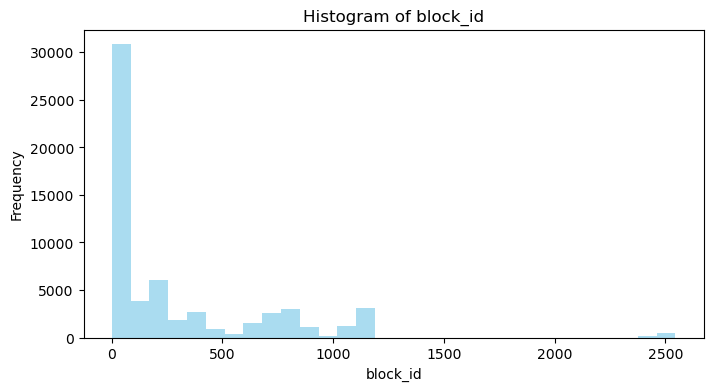

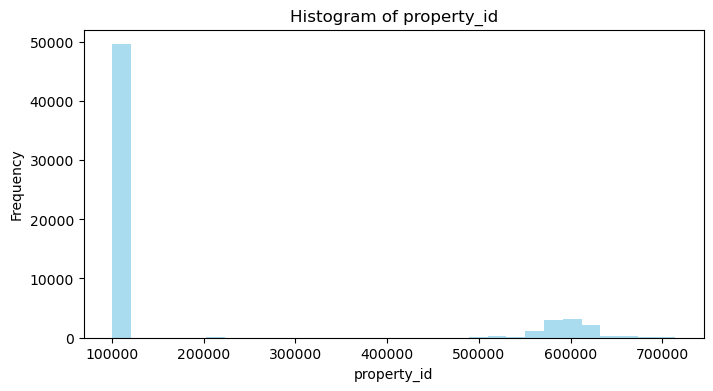

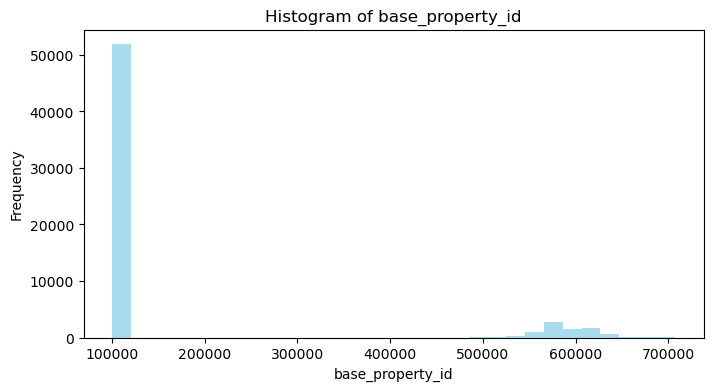

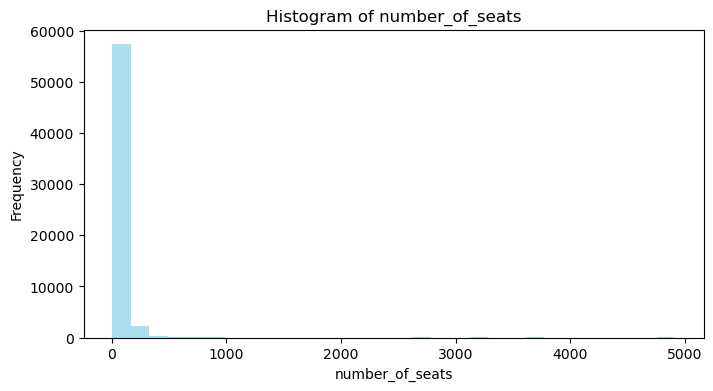

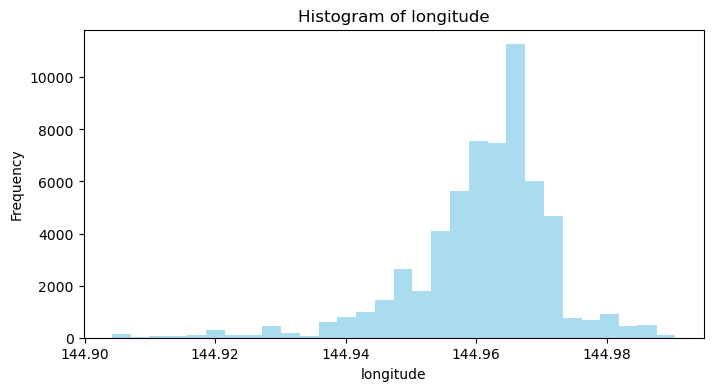

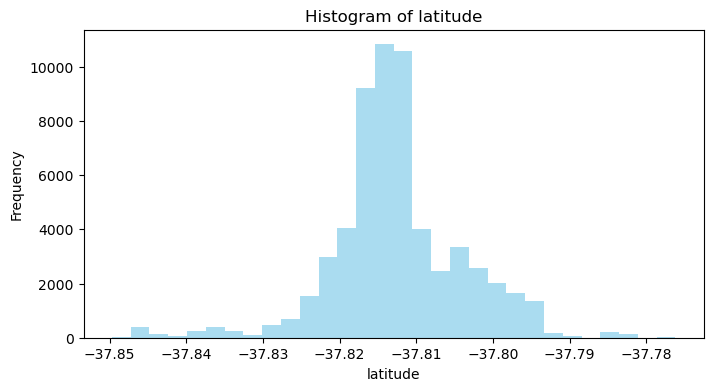

In [26]:
# List of numerical variables
numerical_vars = ["block_id", "property_id", "base_property_id", "number_of_seats", "longitude", "latitude"]

# Loop through the variables and create a histogram for each
for var in numerical_vars:
    plt.figure(figsize=(8, 4))
    plt.hist(df1[var], bins=30, color='skyblue', alpha=0.7)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

### **5.2 Explore Categorical Data**


In [27]:
# Categorical columns

#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data_types =['object', 'float']
df1.describe(include=data_types)

,census_year,building_address,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,longitude,latitude,Seating_Type
count,60055.000,60055,60055,60055,60055,60055.000,60055,60055.000,60055.000,60055
unique,21.000,3294,13,6771,7250,71.000,71,NaN,NaN,2
top,2017.000,183-265 La Trobe Street MELBOURNE 3000,Melbourne (CBD),Subway,"Shop , 535 Little Lonsdale Street MELBOURNE 3000",4511.000,Cafes and Restaurants,NaN,NaN,Indoor
freq,3569.000,711,34224,467,126,44982.000,44982,NaN,NaN,39215
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.961,-37.813,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011,0.009,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.904,-37.850,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.957,-37.817,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.963,-37.813,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.967,-37.809,NaN


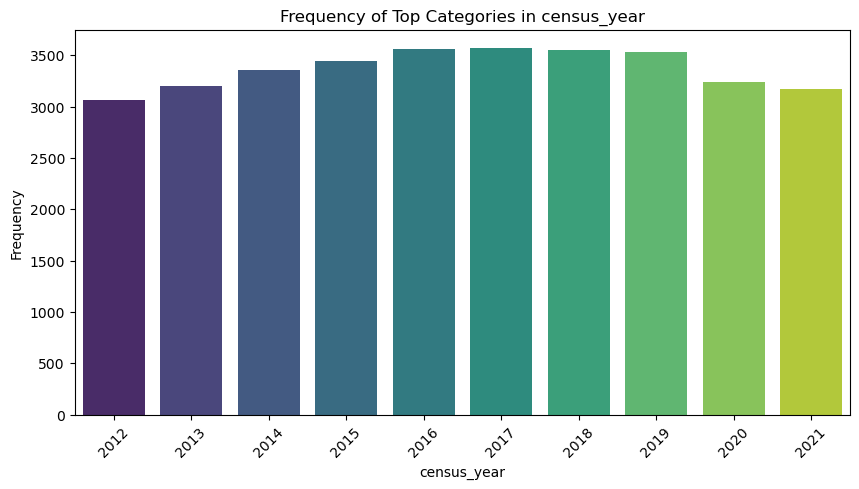

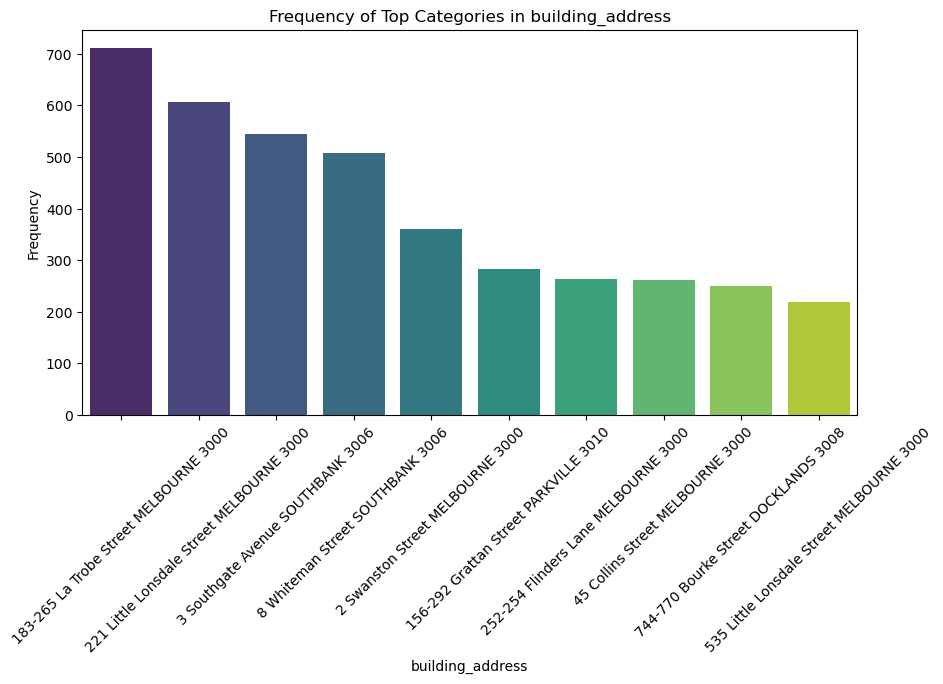

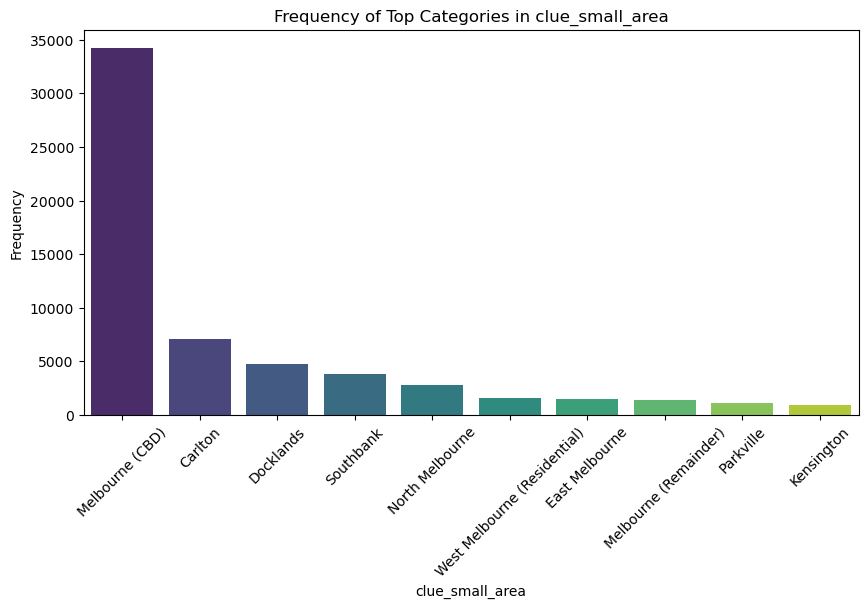

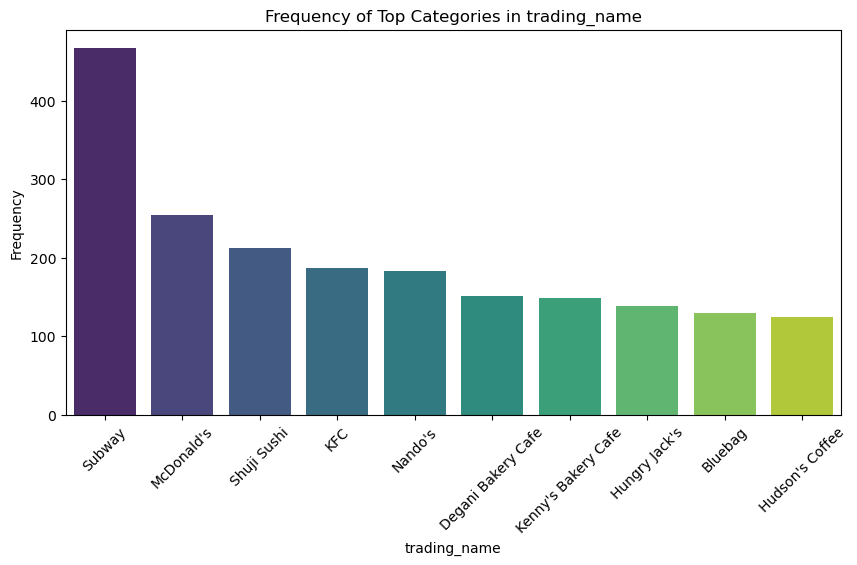

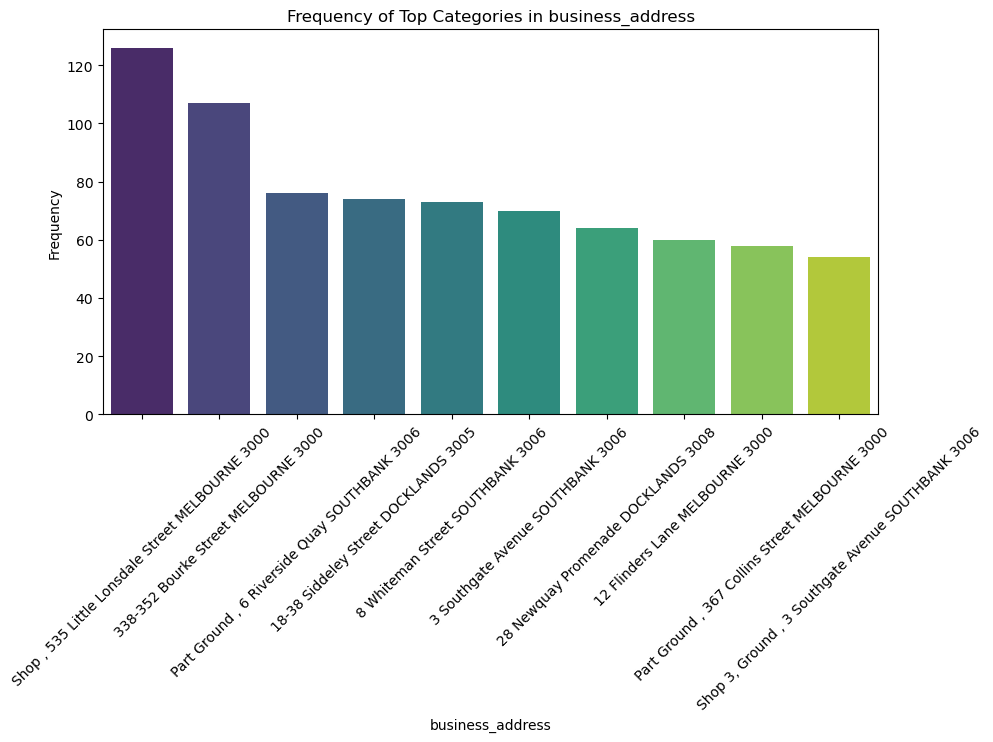

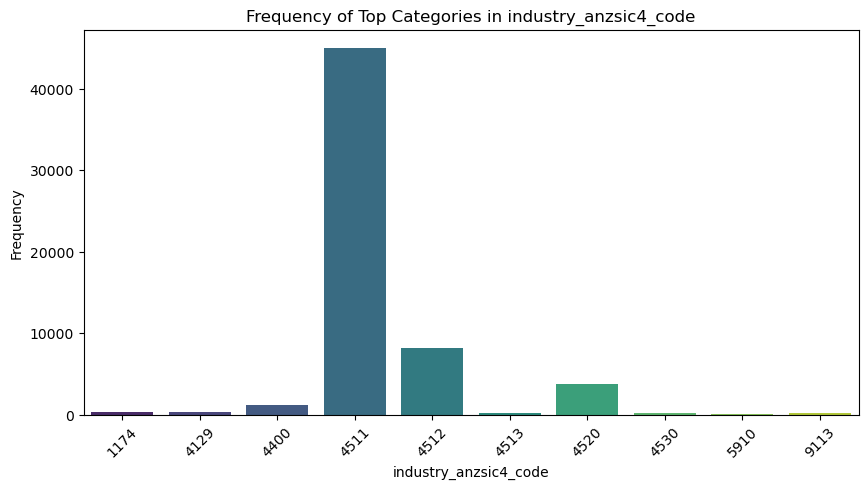

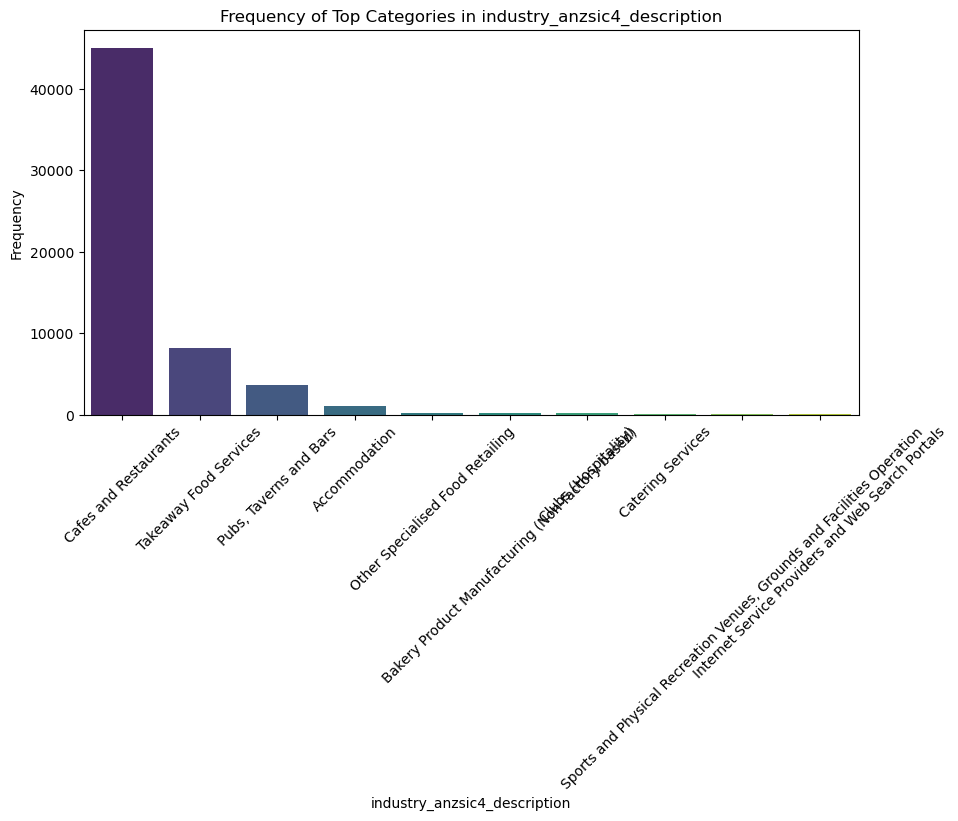

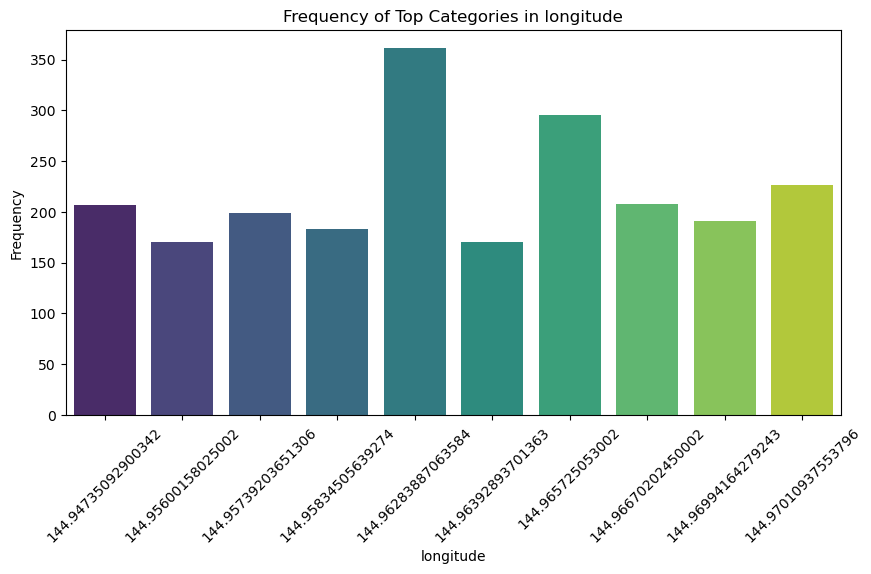

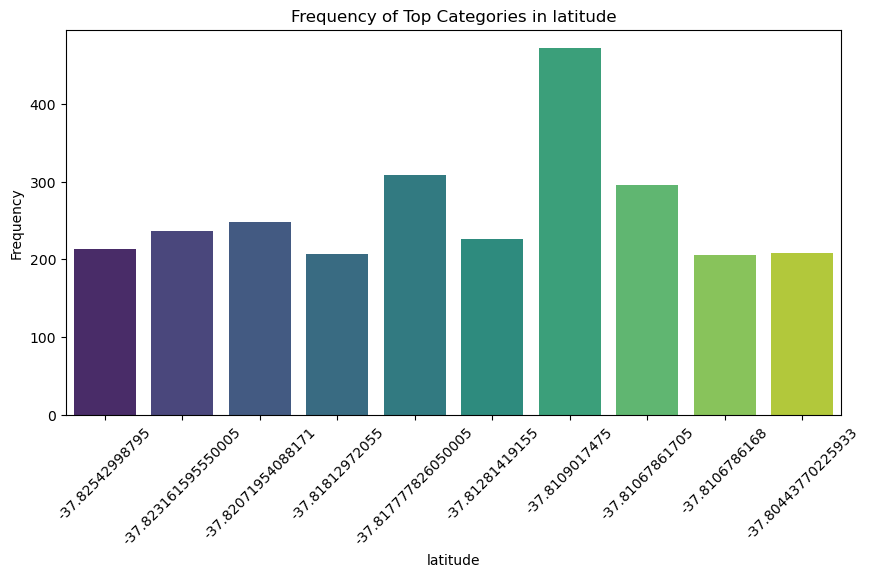

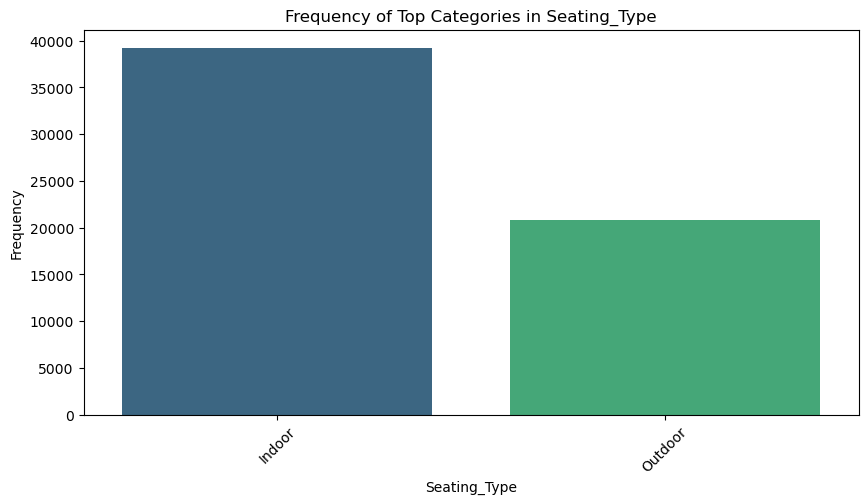

In [28]:
# List of categorical variables
categorical_vars = ["census_year", "building_address", "clue_small_area", "trading_name", "business_address",
                    "industry_anzsic4_code", "industry_anzsic4_description", "longitude", "latitude", "Seating_Type"]

# Loop through the variables and create a bar plot for each
for var in categorical_vars:
    # Selecting the top 10 most frequent categories for large categorical data
    top_categories = df1[var].value_counts().nlargest(10)
    
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
    ax.set_title(f'Frequency of Top Categories in {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate labels for better visibility if needed
    plt.show()

In [29]:
# Save the updated dataframe to a new CSV file
#df1.to_csv('C:/Users/dpmdj/Downloads/cafes-and-restaurants-with-seating-capacity-updated.csv', index=False)

### **6.0: Data Analysis**

In this task, the cleaned and explored data is analyzed to uncover meaningful insights, trends, and relationships that can inform decision-making or further modeling.

This analysis phase is crucial for uncovering hidden insights in the data, helping inform business strategies, modeling, or visualization.


In [30]:
cafes_data = df1

#### **6.1.1 Distribution Analysis**

**Importance of Distribution Analysis for this Use Case**

The purpose of this visualization is to illustrate the distribution of cafes and restaurants across different small areas within Melbourne, as categorized by CLUE (Census of Land Use and Employment) data. This helps identify areas with the highest business density, potential competition, and market opportunities.

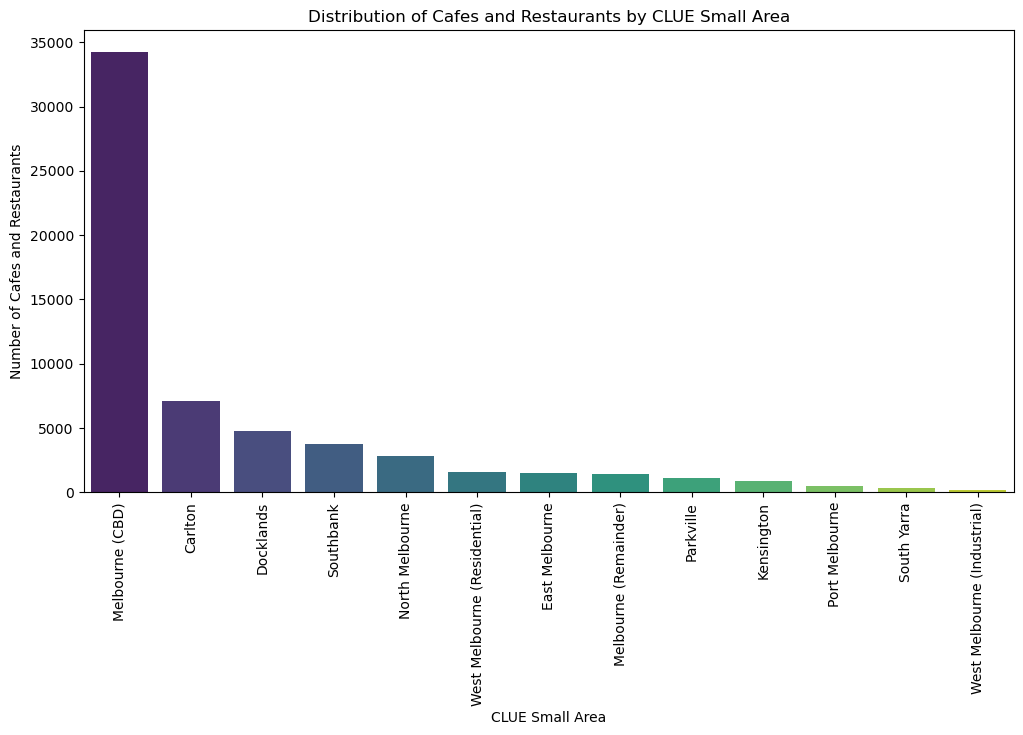

In [31]:
# Distribution of cafes and restaurants by CLUE small area
area_distribution = cafes_data['clue_small_area'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=area_distribution.index, y=area_distribution.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Cafes and Restaurants by CLUE Small Area')
plt.xlabel('CLUE Small Area')
plt.ylabel('Number of Cafes and Restaurants')
plt.show()

**Observations**

1. **Melbourne (CBD) Dominance**:
   - The Melbourne Central Business District (CBD) overwhelmingly leads in the concentration of cafes and restaurants, far surpassing other areas. This suggests the CBD as the central hub for food and beverage businesses due to high foot traffic, business activities, and tourism.

2. **Secondary Concentrations**:
   - Carlton, Docklands, and Southbank have notable, though significantly smaller, numbers of cafes and restaurants. These areas, close to the CBD, serve as important secondary hubs with dense residential populations and business activities.

3. **Smaller Areas**:
   - North Melbourne, East Melbourne, and Parkville have fewer cafes and restaurants, which may reflect lower demand, residential zoning, or less business activity compared to more central areas.

4. **Industrial and Residential Zones**:
   - Areas like West Melbourne (Industrial) show much lower numbers of cafes and restaurants, consistent with their focus on industrial activities or residential purposes rather than commercial food services.

**Conclusion:**

The visualization highlights the concentration of cafes and restaurants in Melbourne, with the CBD as the most significant area. This insight is valuable for businesses and policymakers for making informed decisions regarding development, marketing, and resource allocation.


#### **6.1.2 Seating Capacity Analysis**

**Importance of Seating Capacity Analysis:**

The purpose of this visualization is to compare the total seating capacity available for indoor and outdoor settings across cafes and restaurants. This comparison helps in understanding the distribution of seating arrangements, which can influence business operations, customer preferences, and planning for space utilization.

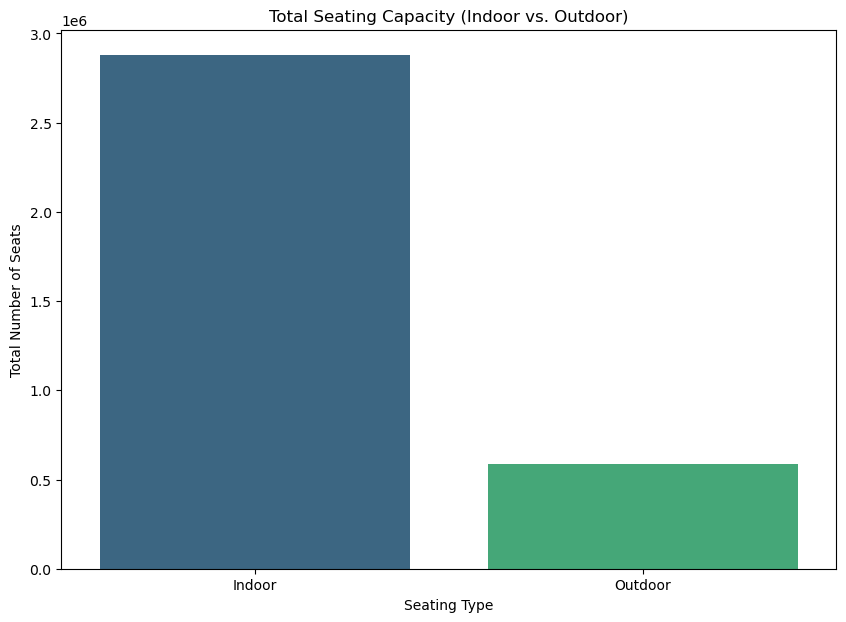

In [32]:
# Seating capacity analysis
seating_capacity = cafes_data.groupby('Seating_Type')['number_of_seats'].sum().reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(x='Seating_Type', y='number_of_seats', data=seating_capacity, palette='viridis')
plt.title('Total Seating Capacity (Indoor vs. Outdoor)')
plt.xlabel('Seating Type')
plt.ylabel('Total Number of Seats')
plt.show()


**Observations:**

1. **Dominance of Indoor Seating**:
   - The total number of indoor seats significantly exceeds the number of outdoor seats. This suggests that cafes and restaurants primarily focus on indoor dining, likely due to factors like weather conditions, space constraints, and customer comfort.

2. **Relatively Lower Outdoor Seating**:
   - The outdoor seating capacity is much smaller in comparison to indoor seating. This could indicate that outdoor seating is more of a supplementary feature, used by businesses to accommodate additional customers during favorable weather or to enhance the dining experience.

3. **Implications for Business Strategy**:
   - The significant difference between indoor and outdoor seating capacity may suggest that businesses prioritize indoor space for regular operations, while outdoor seating may be more seasonal or used to attract specific customer segments looking for an al fresco dining experience.

**Conclusion:**

The visualization highlights the clear preference for indoor seating in cafes and restaurants, with outdoor seating serving as a secondary option. This insight can inform decisions related to space utilization, customer service strategies, and investment in outdoor seating infrastructure.


#### **6.1.3 Industry Analysis**

**Importance of Industry Analysis for this Use Case**

Industry analysis is critical for making informed business decisions in the cafes and restaurants sector. Here's why it's essential:

1. Market Understanding
- **Identifying Trends**: Helps recognize growth, stability, or decline in specific sectors.
- **Competitor Analysis**: Provides insights into competition levels, aiding in strategic positioning.

2. Strategic Planning
- **Resource Allocation**: Guides effective allocation of resources based on industry performance.
- **Risk Management**: Enables proactive planning by understanding industry-specific risks.

3. Customer Insights
- **Targeted Marketing**: Facilitates tailored marketing efforts to specific customer segments.
- **Demand Forecasting**: Assists in predicting customer demand based on industry trends.

4. Operational Efficiency
- **Location Decisions**: Informs where to open new locations by identifying underserved areas.
- **Supply Chain Management**: Optimizes supply chains according to industry needs.

5. Investment Decisions
- **Attracting Investors**: Provides valuable insights to potential investors.
- **Mergers and Acquisitions**: Highlights opportunities for expansion through strategic mergers.

6. Policy and Regulation Awareness
- **Compliance**: Ensures businesses stay compliant with industry-specific regulations.
- **Influence on Policy**: Allows businesses to potentially shape favorable regulations.

In summary, industry analysis is a vital tool for understanding market dynamics, planning strategically, and making decisions that drive business success in the competitive cafes and restaurants industry.


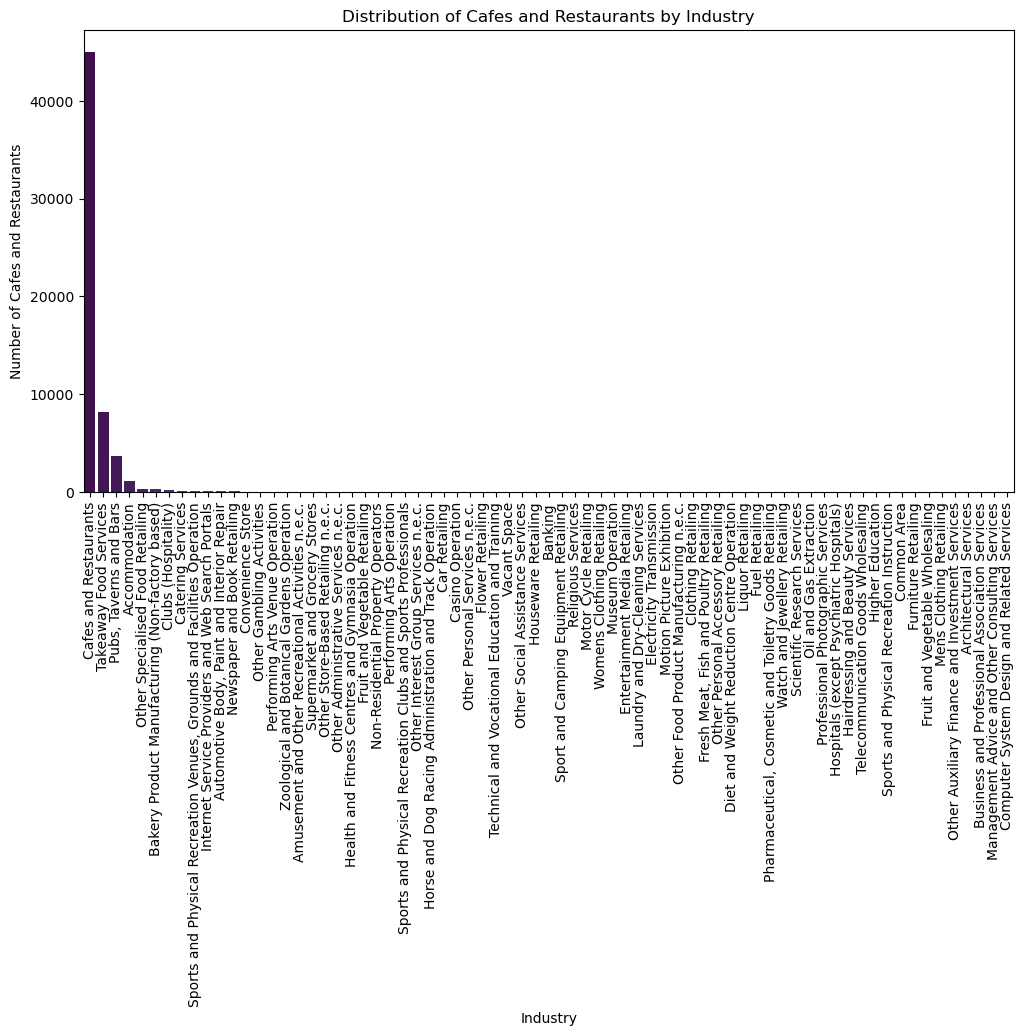

In [33]:
# Industry analysis
industry_distribution = cafes_data['industry_anzsic4_description'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=industry_distribution.index, y=industry_distribution.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Cafes and Restaurants by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Cafes and Restaurants')
plt.show()

**Observations:**
1. **Dominance of Cafes and Restaurants**: The "Cafes and Restaurants" industry dominates the dataset, with a significantly higher number of entries than any other industry.
2. **Long Tail of Industries**: Numerous other industries have very few entries, making them difficult to distinguish in the current plot due to the scale.



#### **6.1.4 Improved Visualization of Cafes and Restaurants by Industry**


**Improvement:**
1. **Filtering or Aggregation**: Filter out industries with very few entries or aggregate similar industries to make the plot more readable.
2. **Logarithmic Scale**: Apply a logarithmic scale to the y-axis to better visualize the distribution of smaller industries.

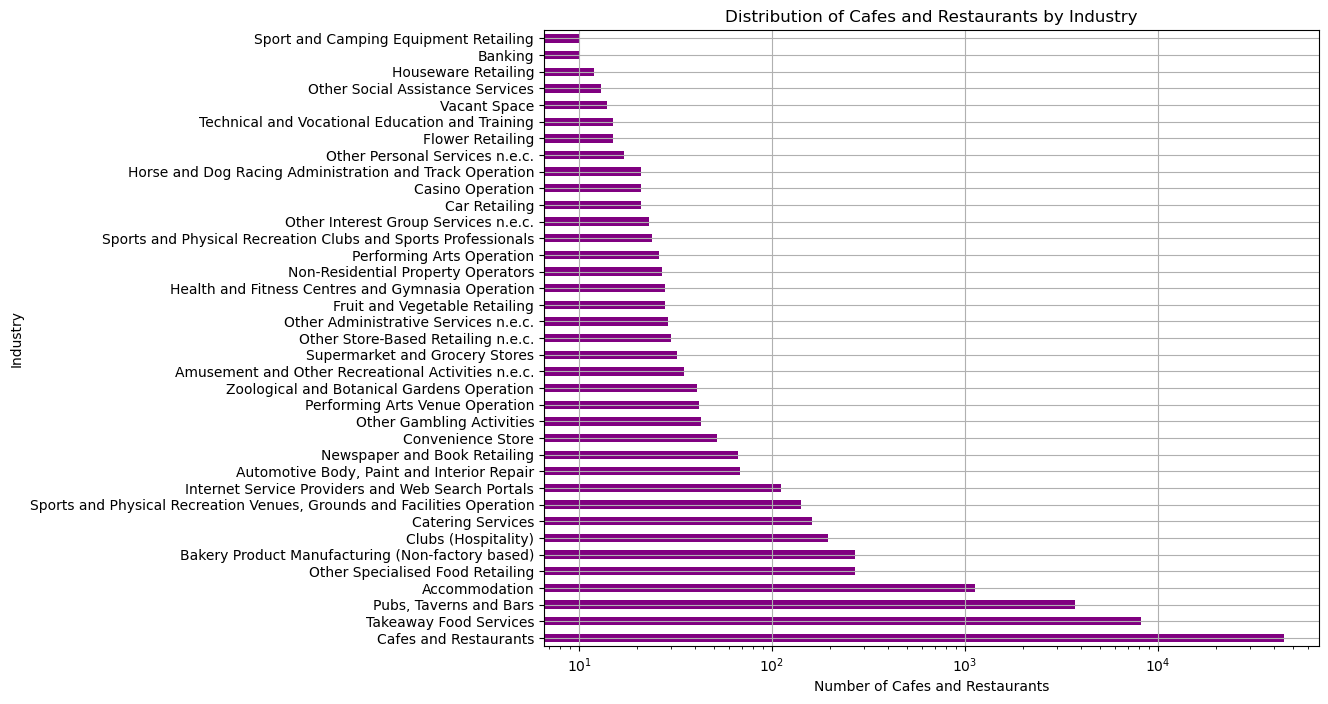

In [34]:
# Group by industry and count the number of entries
industry_counts = cafes_data['industry_anzsic4_description'].value_counts()

# Filter out industries with very few entries (for example, less than 10)
filtered_industry_counts = industry_counts[industry_counts >= 10]

# Sort industries by count
filtered_industry_counts = filtered_industry_counts.sort_values(ascending=False)

# Plot using horizontal bars
plt.figure(figsize=(10, 8))
filtered_industry_counts.plot(kind='barh', color='purple')

plt.title('Distribution of Cafes and Restaurants by Industry')
plt.xlabel('Number of Cafes and Restaurants')
plt.ylabel('Industry')
plt.grid(True)

# Apply a logarithmic scale to the x-axis for better visibility of smaller industries
plt.xscale('log')

plt.show()


**Observations**

1. **Dominance of Cafes and Restaurants**:
   - The "Cafes and Restaurants" industry is the most prominent, with significantly more entries compared to other industries, indicating this sector's major focus in the dataset.

2. **Top Industries**:
   - Following "Cafes and Restaurants," the industries with the highest presence are "Takeaway Food Services," "Pubs, Taverns, and Bars," and "Accommodation." These industries are closely related to the food and hospitality sector.

3. **Logarithmic Scale Usage**:
   - The logarithmic scale on the x-axis effectively highlights the wide range in industry sizes, making it easier to visualize both dominant and smaller industries.

4. **Long Tail of Smaller Industries**:
   - Many industries have significantly fewer entries. The logarithmic scale helps in distinguishing these smaller industries, which would be difficult to see on a linear scale.

5. **Industry Diversity**:
   - The dataset covers a diverse range of industries, from hospitality-related sectors to retail and specialized services, indicating a broad spectrum captured in the dataset.

6. **Importance of Industry Analysis**:
   - This visualization highlights the importance of industry analysis in understanding market dynamics, competition, and identifying potential areas for growth or investment.

**Conclusion:**

The improved visualization provides a clear and informative view of the distribution of cafes and restaurants across various industries. It effectively showcases the dominance of certain sectors while also making smaller industries visible, reflecting the diversity within the dataset.


#### **6.2.0 Geospatial Analysis** 

#### **6.2.1 Interactive map with clustered markers**

**Importance of Clustering in Maps**

Clustering in mapping serves several valuable purposes, especially when dealing with large datasets. Here are the main benefits of using clustering in maps:

**1. Performance Optimization**
Clustering significantly improves the performance of map rendering. By grouping nearby locations into a single cluster, the map reduces the number of elements it needs to render at once. This is particularly useful when dealing with thousands of points, where rendering each point individually could slow down or crash the browser.

**2. Enhanced Usability**
Maps with many individual markers can become cluttered and hard to navigate, especially at higher zoom levels where points may overlap. Clustering simplifies the view by showing aggregated data, making it easier for users to interact with the map. As users zoom in, clusters break apart to show more detail, providing a clearer way to explore data.

**3. Improved Visual Aesthetics**
Clusters help maintain a clean and organized visual appearance of the map. This is crucial for presentations or reports where you want to convey information effectively without overwhelming the viewer with too much data at once.

**4. Dynamic Interaction**
Clusters can dynamically change as users interact with the map, such as zooming in or out. This dynamic aspect helps provide more context to the spatial distribution of data, showing general trends at lower zoom levels and detailed information at higher zoom levels.

**5. Data Summarization**
In addition to grouping points, clusters can also display summarized information, such as the number of points within each cluster or other aggregate statistics (e.g., average number of seats in restaurants within a cluster). This provides immediate insights into the dataset without needing to drill down into individual entries.

**Note**: The code below is commented out to reduce the size of the use case file in GitHub. Additionally, the Web Development team won't be able to publish the full use case on the website due to its size.  
**Please uncomment the code when running it.**

In [35]:
"""
# Use the coordinates of the first entry to center the map
initial_latitude = cafes_data['latitude'].iloc[0]
initial_longitude = cafes_data['longitude'].iloc[0]

# Create a base map centered around the first entry
map_cafes = folium.Map(location=[initial_latitude, initial_longitude], zoom_start=13)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(map_cafes)

# Loop through the data and add each point to the map
for idx, row in cafes_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['trading_name']}<br>{row['building_address']}",
        icon=folium.Icon(icon='cutlery', prefix='fa')
    ).add_to(marker_cluster)

# Save the map to an HTML file (optional)
# map_cafes.save('map_cafes.html')

# Display the map
map_cafes
"""

'\n# Use the coordinates of the first entry to center the map\ninitial_latitude = cafes_data[\'latitude\'].iloc[0]\ninitial_longitude = cafes_data[\'longitude\'].iloc[0]\n\n# Create a base map centered around the first entry\nmap_cafes = folium.Map(location=[initial_latitude, initial_longitude], zoom_start=13)\n\n# Create a MarkerCluster object\nmarker_cluster = MarkerCluster().add_to(map_cafes)\n\n# Loop through the data and add each point to the map\nfor idx, row in cafes_data.iterrows():\n    folium.Marker(\n        location=[row[\'latitude\'], row[\'longitude\']],\n        popup=f"{row[\'trading_name\']}<br>{row[\'building_address\']}",\n        icon=folium.Icon(icon=\'cutlery\', prefix=\'fa\')\n    ).add_to(marker_cluster)\n\n# Save the map to an HTML file (optional)\n# map_cafes.save(\'map_cafes.html\')\n\n# Display the map\nmap_cafes\n'

**Summary:**

In summary, clustering in maps is a practical approach to manage large geospatial datasets, making the maps more user-friendly, performant, and visually appealing. It allows users to gain an overview of the data and explore in detail as needed, enhancing both the functionality and the user experience of the map.

#### **6.2.3 Trend Analysis of Business Activity Over Census Years**

**Importance of Trend Analysis in this Use Case**

Trend analysis is crucial in the hospitality sector, especially for cafes and restaurants, enabling business owners and managers to:

- **Forecast Demand and Sales**: By analyzing historical data on sales, seasonality, and customer preferences, trend analysis helps predict future demand. This is essential for effective inventory and staffing management.

- **Optimize Menu and Pricing**: Identifying popular items and emerging trends through analysis aids in making informed decisions about menu adjustments and pricing strategies, enhancing profitability.

- **Improve Customer Satisfaction**: Insights from trends in customer feedback can pinpoint areas needing improvement in service, ambiance, and menu offerings, which directly influences customer retention and satisfaction.

- **Strategic Expansion**: For businesses looking to expand, trend analysis provides valuable insights into successful locations and market dynamics, supporting strategic decisions about new outlets.

By leveraging trend analysis, cafes and restaurants can make informed decisions that boost operational efficiency, enhance customer satisfaction, and promote overall business growth.


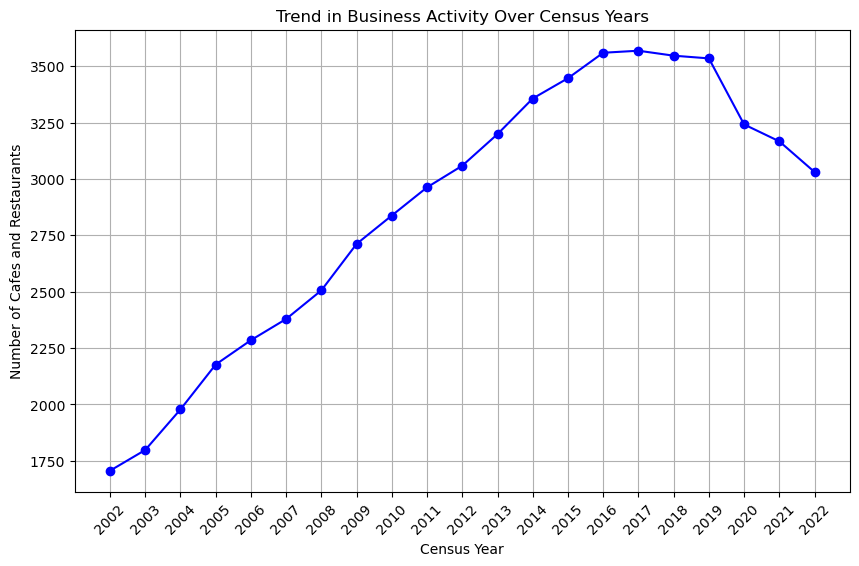

In [36]:
# Group the data by 'census_year' and count the number of cafes and restaurants
trend_data = cafes_data.groupby('census_year').size().reset_index(name='Number of Cafes and Restaurants')

# Create a line plot to visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(trend_data['census_year'], trend_data['Number of Cafes and Restaurants'], marker='o', linestyle='-', color='blue')
plt.title('Trend in Business Activity Over Census Years')
plt.xlabel('Census Year')
plt.ylabel('Number of Cafes and Restaurants')
plt.grid(True)
plt.xticks(trend_data['census_year'], rotation=45)
plt.show()


**Observations:**

1. **Growth Period (2003-2016)**:
   - There was a steady increase in the number of cafes and restaurants from around 2003 to 2016.
   - This period reflects a growing trend in the industry, likely due to economic growth, increasing urbanization, and changes in consumer preferences.

2. **Peak (2016-2017)**:
   - The number of cafes and restaurants peaked around 2016 to 2017.
   - This might indicate a saturation point in the market, where the growth in new cafes and restaurants slowed down.

3. **Decline (2018 onwards)**:
   - A noticeable decline begins around 2018, with a sharper drop around 2019-2020.
   - This drop could be due to various factors such as economic downturns, increased competition, or significant external events like the COVID-19 pandemic, which severely impacted the hospitality industry.

4. **Recent Trend (2022)**:
   - By 2022, the number of cafes and restaurants continues to decline, potentially extending the downward trend from previous years.

## **7.0 Prediction Task**

#### **7.0.1 Determining the Best Prediction Task for the Dataset**

To determine the best prediction task, let's consider the available features and potential business objectives.

**Key Features in Your Dataset**

Based on the description and the previous analysis, the dataset includes both numerical and categorical variables like:

- **Numerical Variables**: block_id, property_id, base_property_id, number_of_seats, longitude, latitude
- **Categorical Variables**: census_year, building_address, clue_small_area, trading_name, business_address, industry_anzsic4_code, industry_anzsic4_description, Seating_Type

**What to Predict**

**1. Predicting Number of Seats**

- **Goal**: Predict the optimal number of seats a new cafe or restaurant should have based on its location, industry type, and other factors.
- **Advantages**: Helps businesses plan their seating capacity to maximize customer comfort and revenue.
- **Data Availability**: Uses features like longitude, latitude, clue_small_area, industry_anzsic4_code, and industry_anzsic4_description.

**2. Predicting Business Success/Failure**

- **Goal**: Predict whether a new cafe or restaurant will succeed or fail based on location, seating capacity, and industry type.
- **Advantages**: Provides insights into the viability of a business venture in a specific area.
- **Data Availability**: Would require a binary target variable indicating success or failure. This might need to be derived from business data or external sources.

**3. Predicting Customer Footfall**

- **Goal**: Predict the expected number of customers based on location, seating capacity, and industry type.
- **Advantages**: Helps in optimizing staffing, inventory, and marketing efforts.
- **Data Availability**: Would require historical data on customer footfall, which may not be directly available.

**4. Predicting Revenue**

- **Goal**: Predict the potential revenue of a cafe or restaurant based on its features.
- **Advantages**: Directly tied to business profitability.
- **Data Availability**: Requires revenue data, which may not be present in the dataset.

**Recommendation**

Given the features in the dataset, predicting the number of seats seems like the most feasible and impactful task. It is directly tied to optimizing the physical setup of cafes and restaurants and uses data that you already have.


#### **7.0.2 Feature Selection:**
Identify the most relevant features for predicting the number of seats.

In [37]:
# Selecting relevant features for predicting the number of seats
features = ['census_year', 'longitude', 'latitude', 'industry_anzsic4_code', 'clue_small_area']
X = df1[features]
y = df1['number_of_seats']  # Target variable

#### **7.0.3 Encoding**
Encode categorical variables using techniques like one-hot encoding.

In [38]:
# One-hot encoding categorical variables
categorical_features = ['census_year', 'industry_anzsic4_code', 'clue_small_area']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], remainder='passthrough')

#### **7.0.4 Train-Test Split**
Split the data into training and testing sets.

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **7.0.5 Model Selection and Training**
Choose an appropriate regression model (e.g., Random Forest, Gradient Boosting, Linear Regression).


In [40]:
# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', RandomForestRegressor(n_estimators=100, random_state=42))])

#### **7.0.6 Train the model**
Train the model on the training set.

In [41]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['census_year',
                                                   'industry_anzsic4_code',
                                                   'clue_small_area'])])),
                ('model', RandomForestRegressor(random_state=42))])

#### **7.0.7 Predict**

In [42]:
# Predict on the test set
y_pred = model.predict(X_test)

#### **7.0.8 Observe Predictions**

In [43]:
# Convert predictions, actual values, and relevant features to a DataFrame for easy comparison
# Reset index to align X_test with y_test
X_test_reset = X_test.reset_index(drop=True)

# Combine actual values, predicted values, and relevant features into a single DataFrame
results_with_features_df = pd.concat([X_test_reset, pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})], axis=1)

# Display the first few rows to compare the actual and predicted values with features
results_with_features_df.head(20)


,census_year,longitude,latitude,industry_anzsic4_code,clue_small_area,Actual,Predicted
0,2020,144.963,-37.816,4511,Melbourne (CBD),16,46.680
1,2004,144.961,-37.807,4512,Melbourne (CBD),8,8.443
2,2014,144.961,-37.806,4511,Carlton,60,60.882
3,2016,144.963,-37.811,4511,Melbourne (CBD),36,82.501
4,2021,144.973,-37.813,4512,Melbourne (CBD),18,14.075
5,2007,144.967,-37.817,4511,Melbourne (CBD),52,29.556
6,2018,144.976,-37.835,4400,Melbourne (Remainder),80,40.622
7,2003,144.964,-37.812,4511,Melbourne (CBD),200,192.822
8,2010,144.955,-37.816,4511,Melbourne (CBD),6,41.252
9,2013,144.961,-37.818,4511,Melbourne (CBD),120,80.967


#### **7.0.9 Model evaluation**

In [44]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Print evaluation metrics in a formatted way
print("Model Evaluation Metrics:")
print("-" * 30)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Evaluation Metrics:
------------------------------
Mean Absolute Error (MAE): 34.65
Mean Squared Error (MSE): 22029.02
Root Mean Squared Error (RMSE): 148.42


#### **7.1.0 Model Evaluation Metrics**
---
- **Mean Absolute Error (MAE):** 34.65
  On average, the model's predictions differ from the actual values by about 34.65 seats. This metric provides a straightforward measure of prediction error.

- **Mean Squared Error (MSE):** 22029.02 
  Represents the average squared difference between the predicted and actual number of seats. MSE penalizes larger errors more significantly due to squaring, making it sensitive to outliers.

- **Root Mean Squared Error (RMSE):** 148.42 
  RMSE provides an error metric in the same units as the target variable (number of seats). An RMSE of 148.42 suggests that the typical prediction error is around 148 seats, indicating considerable variability in the model's predictions.



#### **7.2.0 Interpretation**

The model's performance, as indicated by the evaluation metrics, suggests there is room for improvement. Here are some recommendations:

1. **Feature Engineering**: 
   - Develop new features or transform existing ones to better capture the underlying patterns in the data. Consider clustering locations to identify high-traffic areas or combining features that might jointly affect seating capacity.

2. **Model Tuning**: 
   - Optimize the hyperparameters of the Random Forest model (e.g., number of trees, maximum depth) to improve performance.
   - Experiment with other regression models such as Gradient Boosting, XGBoost, or even neural networks, depending on dataset size and complexity.

3. **Cross-Validation**:
   - Implement cross-validation to ensure that the model is not overfitting and generalizes well to unseen data.

4. **Outlier Handling**:
   - Identify and manage any potential outliers in the data that could be skewing the model's performance.

5. **Ensemble Methods**:
   - Combine predictions from multiple models (e.g., Random Forest, Gradient Boosting) using ensemble techniques to potentially reduce errors and improve prediction accuracy.

By implementing these strategies, you can work towards enhancing the model's predictive performance and reliability.


## **8.0 Conclusion**
The initial goal of this use case was to predict the seating capacity of cafes and restaurants based on available features such as location, industry type, and seating area. After building and evaluating various models, the results showed suboptimal predictive performance (MAE: 34.65, RMSE: 148.42), indicating that the dataset lacked the necessary features to support accurate predictions. Despite this, the dataset holds significant value for **descriptive and exploratory analysis**, providing useful insights into business activity, seating preferences, and geographic distributions.

## **9.0 Key Insights and Findings**
- **Geographic Distribution**: Cafes and restaurants are concentrated in key areas, especially central business districts, which could be correlated with foot traffic or business hubs.
- **Seating Preferences**: A strong preference for indoor seating was observed, which might be due to weather conditions, available space, and operational costs.
- **Industry Trends**: Differences in seating capacity were identified across various types of businesses, with certain industries favoring larger seating arrangements.
- **Temporal Analysis**: Trends in business activity over time indicated that seating capacities have evolved, with modern cafes and restaurants generally accommodating more patrons.

## **10.0 Limitations**
- **Lack of Predictive Features**: The dataset does not include critical variables like customer demand, revenue, or local demographics, which are necessary for accurate predictions of seating capacity.
- **High Variability**: There is considerable variability and noise in the dataset, making it difficult for models to find consistent patterns.
- **Data Quality Issues**: The dataset contains missing values and potential inconsistencies, which limited the model’s ability to generalize effectively.
- **Static Dataset**: The dataset appears static and lacks external dynamic data (e.g., events, seasonality), which could provide more predictive power for tasks like seat prediction or customer forecasting.

## **11.0 Recommendations**
- **Incorporate Additional Data**: Future efforts should focus on integrating external data, such as customer footfall, weather patterns, or revenue, to better predict business outcomes.
- **Advanced Feature Engineering**: Use advanced feature engineering techniques, such as creating interaction variables between geographic location and seating type or clustering locations based on foot traffic patterns.
- **Focus on Descriptive Analytics**: With the current dataset, it would be more beneficial to focus on descriptive analytics, such as understanding regional seating capacity trends, rather than pursuing predictive modeling.
- **Consider Time-Series Data**: Explore adding temporal or time-series data, like business growth over time or customer trends, to enhance both descriptive and predictive analyses.

## **12.0 Next Steps**
- **Clustering Analysis**: Apply clustering techniques to group cafes and restaurants by seating capacity and location to identify potential high-demand areas and provide actionable insights for business planning.
- **Correlation with External Factors**: Investigate correlations between external factors (e.g., population density, events) and seating capacity, which could provide more insight into seating trends.
- **Alternative Prediction Tasks**: If more comprehensive data becomes available, consider other prediction tasks, such as forecasting customer footfall or revenue prediction based on external and internal business factors.

## **13.0 Reflection**
This project highlighted the crucial role that high-quality, relevant data plays in predictive modeling. The lack of critical features, such as customer behavior and business performance metrics, limited the model's ability to make accurate predictions. However, the dataset provided valuable insights for descriptive analysis, helping to identify trends in seating preferences and business locations. In the future, focusing on data collection and curation that aligns with the prediction goals will be essential for building more effective models. Additionally, combining predictive tasks with deeper exploratory analysis will allow for more actionable business insights.


## **14.0 References**

1. City of Melbourne. (n.d.). *Floor space by use by block*. Melbourne Open Data. Retrieved from https://data.melbourne.vic.gov.au/explore/dataset/floor-space-by-use-by-block/information/
2. City of Melbourne. (n.d.). *Employment by block by CLUE industry*. Melbourne Open Data. Retrieved from https://data.melbourne.vic.gov.au/explore/dataset/employment-by-block-by-clue-industry/information/
3. City of Melbourne. (n.d.). *Blocks for Census of Land Use and Employment (CLUE)*. Melbourne Open Data. Retrieved from https://data.melbourne.vic.gov.au/explore/dataset/blocks-for-census-of-land-use-and-employment-clue/information/?location=13,-37.80246,144.94417&basemap=mbs-7a7333
4. City of Melbourne. (n.d.). *Cafes and restaurants with seating capacity*. Melbourne Open Data. Retrieved from https://data.melbourne.vic.gov.au/explore/dataset/cafes-and-restaurants-with-seating-capacity/information/
